<a href="https://colab.research.google.com/github/JGrant3101/ME4MachineLearning/blob/main/Tutorial10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the libraries we might need and setting the random seed to 0
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import numpy as np
import sklearn
import math
from sklearn import decomposition
from sklearn import datasets
from sklearn import model_selection
from sklearn import naive_bayes
from sklearn import linear_model
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn import cluster
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.neighbors import KernelDensity
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
import pandas
import plotly.graph_objects as go
import sys
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *

# Setting random seed to 0
np.random.seed(0)

Dataset 1

In [2]:
# Start by importing the dataset
dataset1 = pandas.read_csv("http://pogo.software/me4ml/slip_data.csv")
# Assigning data, three of the inputs will be ignored as they are constant for every different value of f2 and f2angle
f2 = np.array(dataset1['f2'][:])
f2ang = np.array(dataset1['f2ang'][:])
# This is the output
slips = np.array(dataset1['slips'][:])
# Converting the slips array to a binary
slips_binary = to_categorical(slips)

# Going to scale the two inputs
f2mean = np.mean(f2)
f2angmean = np.mean(f2ang)
f2std = np.std(f2)
f2angstd = np.std(f2ang)

f2scaled = (f2 - f2mean)/f2std
f2angscaled = (f2ang - f2angmean)/f2angstd

# Putting the inputs all into 1 input array
Inputs1 = np.zeros((1000, 2))
Inputs1[:, 0] = f2scaled
Inputs1[:, 1] = f2angscaled

Above the input array has been created that will be patsed into the neural network

In [3]:
# Initialising the neural network
model1 = Sequential()

# Adding layers, these are pre defined in the tutorial sheet
model1.add(Dense(units = 4, activation = 'tanh', input_dim = 2))
model1.add(Dense(units = 2, activation = 'softmax'))

# Compiling the model
model1.compile(loss = 'categorical_crossentropy', optimizer = 'Adam')
# Fitting the model
model1.fit(Inputs1, slips_binary, epochs = 1200, batch_size = 20)

Epoch 1/1200
50/50 [==============================] - 4s 14ms/step - loss: 0.6748
Epoch 2/1200
50/50 [==============================] - 1s 15ms/step - loss: 0.6228
Epoch 3/1200
50/50 [==============================] - 1s 14ms/step - loss: 0.5826
Epoch 4/1200
50/50 [==============================] - 0s 8ms/step - loss: 0.5503
Epoch 5/1200
50/50 [==============================] - 1s 11ms/step - loss: 0.5235
Epoch 6/1200
50/50 [==============================] - 1s 11ms/step - loss: 0.5014
Epoch 7/1200
50/50 [==============================] - 0s 8ms/step - loss: 0.4833
Epoch 8/1200
50/50 [==============================] - 0s 5ms/step - loss: 0.4688
Epoch 9/1200
50/50 [==============================] - 0s 3ms/step - loss: 0.4576
Epoch 10/1200
50/50 [==============================] - 0s 5ms/step - loss: 0.4489
Epoch 11/1200
50/50 [==============================] - 0s 3ms/step - loss: 0.4423
Epoch 12/1200
50/50 [==============================] - 0s 3ms/step - loss: 0.4373
Epoch 13/1200
50/50 

Above the neural network has been created and trained as suggested in the tutorial sheet

In [4]:
# Plotting results for the ranges specified in the question
f2plot = np.linspace(0, 40, 401)
f2angplot = np.linspace(0, 360, 3601)

# Scaling inputs
f2plotscaled = (f2plot - f2mean)/f2std
f2angplotscaled = (f2angplot - f2angmean)/f2angstd

# Creating the mesh grid
x1mesh, x2mesh = np.meshgrid(f2plotscaled, f2angplotscaled)
Xgrid = np.array([x1mesh, x2mesh]).reshape([2, 401*3601]).T

# Predicting for the meshgrid
model1results = model1.predict(Xgrid)

45126/45126 [==============================] - 67s 1ms/step


Above we have generated all the points we want to predict for and then predicted if they will slip or not using the neural network

Text(0.5, 1.0, 'Decision function using neural network as specified in the question, 1 indicates slip occurring')

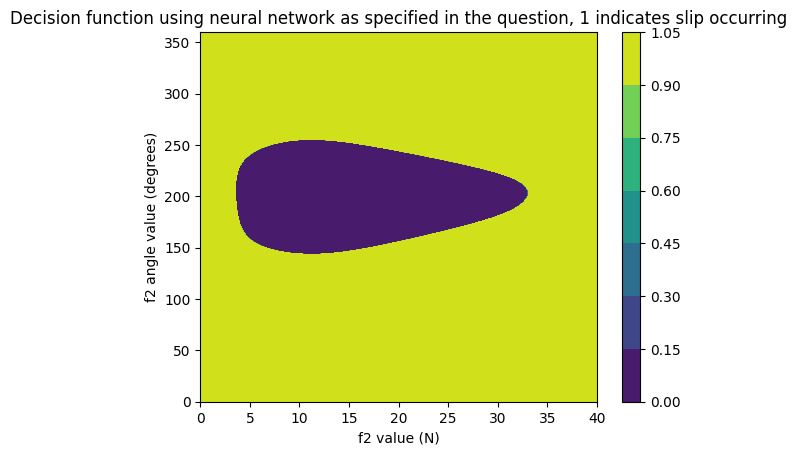

In [5]:
# Converting our output to binary
model1resultsbinary = np.zeros([len(model1results[:,0])])
for i in range(len(model1results[:, 0])):
  if (model1results[i, 0] < model1results[i, 1]):
    model1resultsbinary[i] = 1
  else:
    model1resultsbinary[i] = 0

# Reshaping the binary result
model1resultsbinaryreshape = np.reshape(model1resultsbinary, [3601, 401])

# Plotting
fig1, ax1 = plt.subplots()
plt.contourf(f2plot, f2angplot, model1resultsbinaryreshape)
plt.colorbar()
plt.xlabel('f2 value (N)')
plt.ylabel('f2 angle value (degrees)')
plt.title('Decision function using neural network as specified in the question, 1 indicates slip occurring')

# Not required for submission but plotting input data to verify whether model is accurate
#plt.scatter(f2[slips==1], f2ang[slips==1], label = 'Slip')
#plt.scatter(f2[slips==0], f2ang[slips==0], label = 'No slip')
#plt.legend()

Above we have plotted out results

Text(0.5, 1.0, 'Decision function using analytical solution, 1 indicates slip occurring')

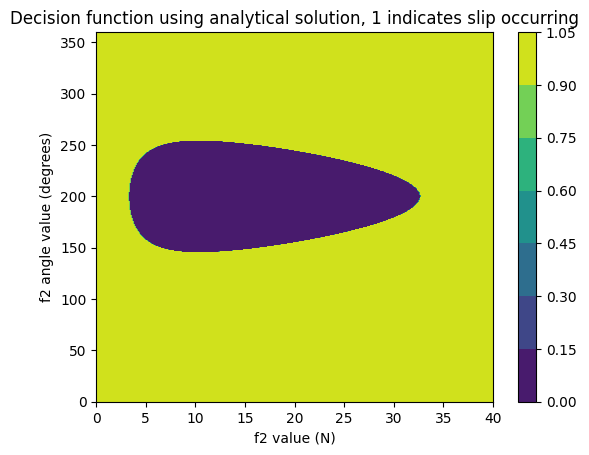

In [6]:
# Analytical solution
# Setting up inputs
f1an = 18
f1anang = 20
f2an = f2plot
f2anang = f2angplot
analyticmodelresults = np.zeros([3601, 401])

# Running for loop to determine whether slip occurs or not
for i in range(len(f2an)):
  for j in range(len(f2anang)):
    # Defining the x and y components of force
    Fx = f1an * math.cos(math.radians(f1anang)) + f2an[i] * math.cos(math.radians(f2anang[j]))
    Fy = f1an * math.sin(math.radians(f1anang)) + f2an[i] * math.sin(math.radians(f2anang[j]))

    # Determining overall magnitude of force
    Fmag = math.sqrt(Fx**2 + Fy**2)

    # Defining if this will cause slip or not
    if Fmag > 1.5*9.81:
      analyticmodelresults[j, i] = 1

# Plotting
fig2, ax2 = plt.subplots()
plt.contourf(f2an, f2anang, analyticmodelresults)
plt.colorbar()
plt.xlabel('f2 value (N)')
plt.ylabel('f2 angle value (degrees)')
plt.title('Decision function using analytical solution, 1 indicates slip occurring')

Above we have calculated an analytical solution and then plotted a decision function for it

Dataset 2

In [ ]:
# Start by importing the dataset
dataset2 = pandas.read_csv("http://pogo.software/me4ml/slip_data_full.csv")
# Assigning data
f1 = np.array(dataset2['f1'][:])
f1ang = np.array(dataset2['f1ang'][:])
f2 = np.array(dataset2['f2'][:])
f2ang = np.array(dataset2['f2ang'][:])
# This is the output
slips2 = np.array(dataset2['slips'][:])

# Creating an inputs array
Inputs2 = np.zeros((10000, 4))
Inputs2[:, 0] = f1
Inputs2[:, 1] = f1ang
Inputs2[:, 2] = f2
Inputs2[:, 3] = f2ang

Above we have imported the dataset and created an input array from it

In [ ]:
# Initilising the SVM using the parameters defined in the question
svm = SVC(C = 1000, gamma = 'scale', kernel = 'rbf')

# Fitting the svm to the dataset
svm.fit(Inputs2, slips2)

# Wants us to plot a decision function for f1 = 10 N and f1ang = 30 degrees and the same f2 and f2ang range as before
# Defining inputs
f2plot = np.linspace(0, 40, 401)
f2angplot = np.linspace(0, 360, 3601)
f1plot = 10
f1angplot = 30

# Making into 1 array
PlottingInputs = np.zeros([1444001, 4])
PlottingInputs[:, 0] = f1plot
PlottingInputs[:, 1] = f1angplot

x1mesh, x2mesh = np.meshgrid(f2plot, f2angplot)
Xgrid = np.array([x1mesh, x2mesh]).reshape([2, 401*3601]).T
PlottingInputs[:, 2] = Xgrid[:, 0]
PlottingInputs[:, 3] = Xgrid[:, 1]

# predicting values
results = svm.predict(PlottingInputs)

Above we have initialised and trained our support vector machine model and then used it to predict values to visualise a decision function

Text(0.5, 1.0, 'Decision function using svm as specified in the question, 1 indicates slip occurring')

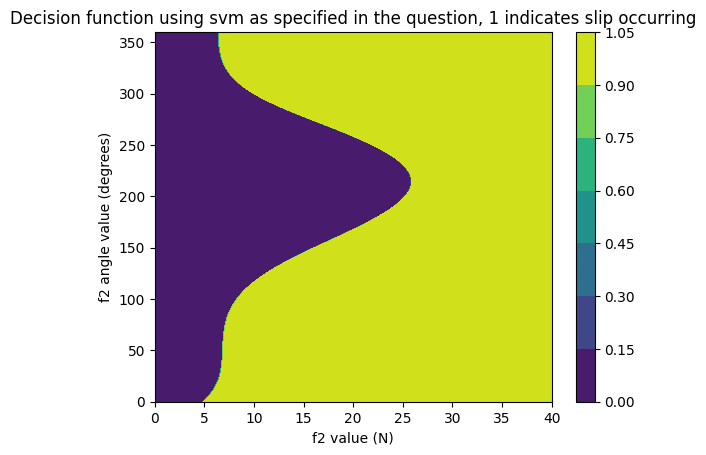

In [ ]:
# Plotting
resultsreshape = np.reshape(results, [3601, 401])

fig3, ax3 = plt.subplots()
plt.contourf(f2plot, f2angplot, resultsreshape)
plt.colorbar()
plt.xlabel('f2 value (N)')
plt.ylabel('f2 angle value (degrees)')
plt.title('Decision function using svm as specified in the question, 1 indicates slip occurring')

Above we have plotted the predicted results from out svm

Text(0.5, 1.0, 'Decision function using analytical solution, 1 indicates slip occurring')

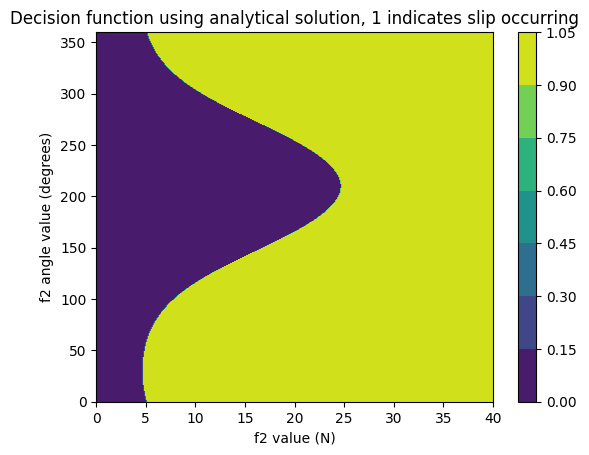

In [ ]:
# Rerunning the analytical solution for this new case and plotting to verify our svm results
# Analytical solution
# Setting up inputs
f1an = 10
f1anang = 30
f2an = f2plot
f2anang = f2angplot
analyticmodelresults = np.zeros([3601, 401])

# Running for loop to determine whether slip occurs or not
for i in range(len(f2an)):
  for j in range(len(f2anang)):
    # Defining the x and y components of force
    Fx = f1an * math.cos(math.radians(f1anang)) + f2an[i] * math.cos(math.radians(f2anang[j]))
    Fy = f1an * math.sin(math.radians(f1anang)) + f2an[i] * math.sin(math.radians(f2anang[j]))

    # Determining overall magnitude of force
    Fmag = math.sqrt(Fx**2 + Fy**2)

    # Defining if this will cause slip or not
    if Fmag > 1.5*9.81:
      analyticmodelresults[j, i] = 1

# Plotting
fig2, ax2 = plt.subplots()
plt.contourf(f2an, f2anang, analyticmodelresults)
plt.colorbar()
plt.xlabel('f2 value (N)')
plt.ylabel('f2 angle value (degrees)')
plt.title('Decision function using analytical solution, 1 indicates slip occurring')